In [13]:
import  numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
%matplotlib inline

In [14]:
X , y = make_moons(n_samples=1000, noise=0.2)

In [15]:
X.shape

(1000, 2)

In [16]:
y.shape

(1000,)

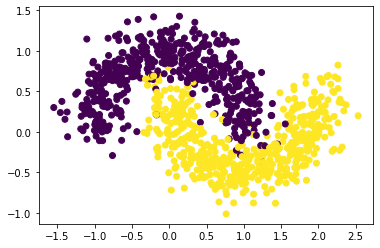

In [17]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [18]:
def plotDecisionBoundary(pred_func):
    x1 = np.arange(np.min(X[:,0]) - 1, np.max(X[:,0]) + 1, 0.01)
    x2 = np.arange(np.min(X[:,1]) - 1, np.max(X[:,1]) + 1, 0.01)
    
    xx,yy = np.meshgrid(x1,x2)
    x = np.array([xx.flatten(), yy.flatten()]).T
    z = pred_func(x)
    z = z.reshape(xx.shape)
    
    plt.contourf(xx,yy,z,cmap=ListedColormap(('red','green')))
    plt.scatter(X[:,0], X[:,1], c=y)
    #plt.show()

In [19]:
logistic = LogisticRegression()
logistic.fit(X,y)

LogisticRegression()

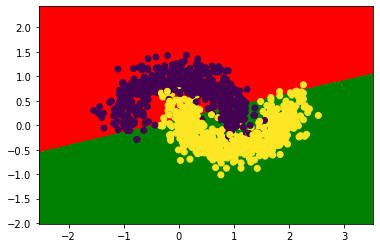

In [20]:
plotDecisionBoundary(lambda x : logistic.predict(x))

In [21]:
n = len(X )
inputNeurons = 2
outputNeurons = 2

In [22]:
def predict(model, x):
    wh, bh, wout, bout = model['wh'], model['bh'], model['wout'], model['bout']
    z1 = np.dot(x,wh) + bh
    hidden = np.tanh(z1)
    z2 = np.dot(hidden,wout) + bout
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [23]:
def build_model(inputNeurons, hiddenNeurons, epochs, alpha):
    wh = np.random.uniform(size=(inputNeurons, hiddenNeurons))
    bh = np.random.uniform(size=(1,hiddenNeurons))
    wout = np.random.uniform(size=(hiddenNeurons, outputNeurons))
    bout = np.random.uniform(size=(1,outputNeurons))
    
    model = {}
    
    for i in range(epochs):
    
        # feedforward
        z1 = np.dot(X,wh) + bh
        hidden = np.tanh(z1)
        z2 = np.dot(hidden,wout) + bout
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # backpropgation
        delta = probs
        delta[range(n), y] -= 1

        errorHidden = delta.dot(wout.T)
        slopeHidden = 1 - np.power(hidden, 2)
        deltaHidden = errorHidden * slopeHidden

        wout += hidden.T.dot(delta) * (-alpha)
        bout += np.sum(delta, axis=0, keepdims=True) * (-alpha)
        wh += X.T.dot(deltaHidden) * (-alpha)
        bh += np.sum(deltaHidden, axis=0, keepdims=True) * (-alpha)

        model = {'wh' : wh, 'wout' : wout, 'bh' : bh, 'bout' : bout}

    return model

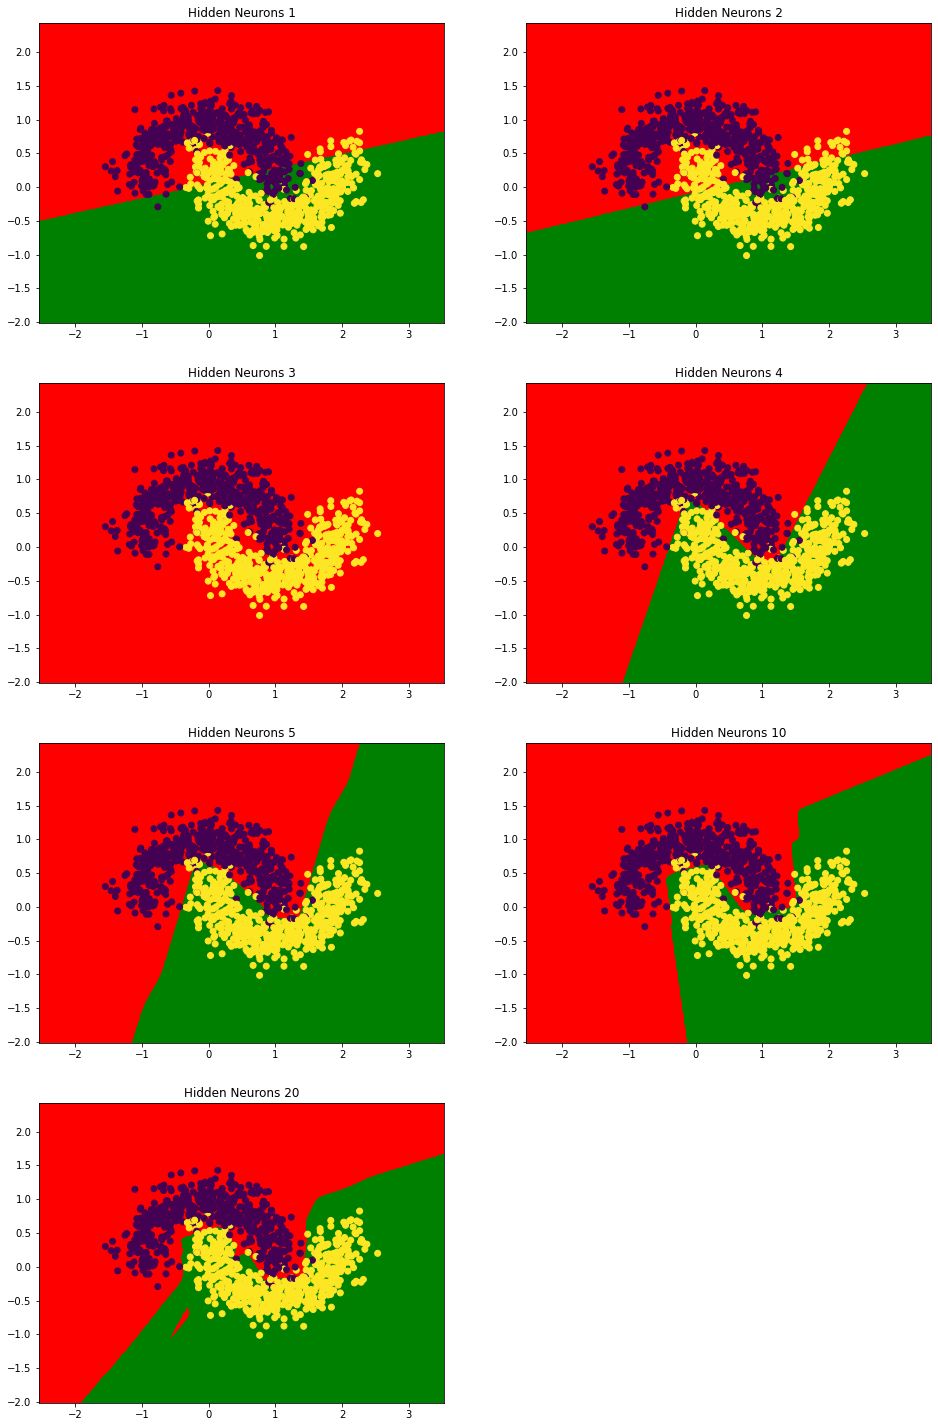

In [24]:
epochs = 10000
alpha = 0.01
plt.figure(figsize=(16,32))
neurons = [1,2,3,4,5,10,20]
for i, hiddenNeuron in enumerate(neurons):
    plt.subplot(5,2,i+1)
    plt.title('Hidden Neurons %d'%hiddenNeuron)
    model = build_model(inputNeurons, hiddenNeuron, epochs, alpha)
    plotDecisionBoundary(lambda x : predict(model, x))
plt.show()